#Langraph

In [ ]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 18.9 MB/s eta 0:00:00


In [ ]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
langsmith = userdata.get('langsmith_api_key')


In [ ]:
import os
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "CourseLanggraph"

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name = "gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7e393e2e0150>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7e393e2c9e90>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start building chatbot using langgraph

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
  # Messages have the type "list". The 'add_messages' function in the annotation defines
    # how this state key should be updated
    #(in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list,add_messages]

graph_builder = StateGraph(State)

In [ ]:
graph_builder

In [ ]:
#state["messages"] will have the user queries.
# responses will also be added in the messages variable in the class state with help of add_message inbuilt function
#the next query again will be added in state['messages'], and process will go on
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [ ]:
graph_builder.add_node("chatbot",chatbot)

In [ ]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [ ]:
graph = graph_builder.compile()

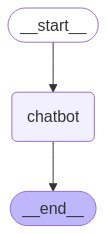

In [20]:
from IPython.display import Image,display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [21]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break

  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value['messages'].content)

User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋\n\nWhat can I do for you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001999915, 'queue_time': 0.020493616, 'total_time': 0.029272642}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run--7f7a411c-d964-4d79-81e6-8afee56a967c-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})}])
content='Hello! 👋\n\nWhat can I do for you today?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001999915, 'queue_time': 0.020493616, 'total_time': 0.029272642}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run--7f7a4

## Langgraph chatbot with tools

In [26]:
!pip install langgraph langsmith

In [27]:
!pip install langchian langchian_groq langchain_community

ERROR: Could not find a version that satisfies the requirement langchian (from versions: none)
ERROR: No matching distribution found for langchian


In [31]:
!pip install arxiv wikipedia

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.4 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=06610fccba8a9e25b8fc97734db4ea0303ab3cf3ab91e37f12b6cced88899810
  Stored in directory: /root/.cache/pip/wheels/8f/ab/cb/45ccc40522d3a1c41e1d2ad53b8f33a62f394011ec38cd71c6
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=8ed6db3148607ff1f0b1d39c4ec777ad47efcd8073f65babb4059c7fb7f4dc67
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built wikipedia sgmllib3k


In [23]:
from typing import Annotated
from typing_extensions import TypedDict

In [35]:
## working with external tools
##ArxivAPIWrapper --> if you need to interact with any research paper, external tool provided by langchain
## WikipediaAPIWrapper --> this is for wikpidea search , external tool ,provided by langchian
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun


#Arxiv And Wikipedia tools
arxiv_wrapper = ArxivAPIWrapper(top_k_results=1,doc_content_chars_max=300)
arxiv_tool = ArxivQueryRun(api_wrapper= arxiv_wrapper)

wikipedia_wrapper = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=300)
wikipedia_tool = WikipediaQueryRun(api_wrapper = wikipedia_wrapper)

In [36]:
wikipedia_tool.invoke("who is shree ram")

'Page: Jai Shri Ram\nSummary: Jai Shri Ram (IAST: Jaya Śrī Rāma) is an expression in Indic languages, translating to "Glory to Lord Rama" or "Victory to Lord Rama". The proclamation has been used by Hindus as a symbol of adhering to the Hindu faith, or for projection of varied faith-centered emotions.'

In [37]:
arxiv_tool.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with "

In [38]:
tools=[wikipedia_tool]

In [39]:
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph,START,END

## Langgraph Application
class state(TypedDict):
  messages: Annotated[list,add_messages]

In [40]:
graph_builder = StateGraph(state)

In [43]:
from langchain_groq import ChatGroq
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')

In [44]:
llm = ChatGroq(groq_api_key = groq_api_key,model_name = "gemma2-9b-it")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7e39293e4f10>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7e392bfe3010>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [47]:
llm_with_tools = llm.bind_tools(tools = tools)

In [48]:
def chatbot(state = State):
  return {"messages":llm_with_tools.invoke(state['messages'])}

In [49]:
from langgraph.prebuilt import ToolNode,tools_condition

In [50]:
graph_builder.add_node("chatbot",chatbot)
graph_builder.add_edge(START,"chatbot")
tool_node = ToolNode(tools = tools)
graph_builder.add_node("tools",tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)
graph_builder.add_edge("tools","chatbot")
graph_builder.add_edge("chatbot",END)

In [51]:
graph = graph_builder.compile()

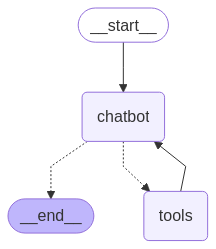

In [52]:
from IPython.display import Image,display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [54]:
user_input = "Hi there!, My name is John"
events = graph.stream(
    {'messages':[("user",user_input)]},stream_mode = "values"
)

for event in events:
  event["messages"][-1].pretty_print()


================================ Human Message =================================

Hi there!, My name is John
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_3wkn)
 Call ID: call_3wkn
  Args:
    query: John
================================= Tool Message =================================
Name: wikipedia

No good Wikipedia Search Result was found
================================== Ai Message ==================================

It's nice to meet you, John!  

Is there anything else I can help you with?


/usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.11/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')
